# Vector autoregressive (VAR) models

Two time series, $\{x_t\}$ and $\{y_t\}$, follow a vector autoregressive 
process of order 1 (denoted VAR(1)) if

$$
x_t = \theta_{11}x_{t−1} + \theta_{12}y_{t−1} + w_{x,t}
$$
$$
y_t = \theta_{21}x_{t−1} + \theta_{22}y_{t−1} + w_{y,t}
$$

where $\{w_{x,t}\}$ and $\{w_{y,t}\}$ are **bivariate white noise** and $\theta_{ij}$ are model parameters.

Equivalently,

$$
Z_{t} = \Theta Z_{t-1} + w_t
$$

where

$$
 Z_t =
\begin{bmatrix}
x_t \\
y_t
\end{bmatrix}
$$
$$
\Theta =
\begin{bmatrix}
\theta_{11} & \theta_{12}\\
\theta_{12} & \theta_{22}
\end{bmatrix}
$$
$$
w_t =
\begin{bmatrix}
w_{x,t} \\
w_{y,t}
\end{bmatrix}
$$

The stability of a VAR(1) model is often assessed by examining the location of the **eigenvalues** in the **complex plane**. If all eigenvalues lie **inside the unit circle**, the system is **stable** over time. If any eigenvalues lie **outside** the unit circle, the system may be **unstable**, and the variables could exhibit explosive behavior.

The characteristic equation is given by:
$$
det(\Theta- \lambda I) = 0
)
$$
where:

$ \Theta$ is the coefficient matrix, $\lambda$ represents the eigenvalues, $I$ is the identity matrix,det denotes the determinant.
 


For the VAR(1) model, the determinant is given by

$$
\begin{vmatrix}
1 - \theta_{11}x & -\theta_{12} x\\
-\theta_{21}x & 1  - \theta_{22}x\\
\end{vmatrix}
$$

$$
= (1 - \theta_{11}x)(1 - \theta_{22}x) - \theta_{12}\theta_{21}x^2
$$


The **R** functions **polyroot** and **Mod** can be used to test whether a VAR model
is **stationary**, where the function polyroot just takes a vector of polynomial
coefficients as an input parameter. 

For example, consider the VAR(1) model with paramter matrix

$$
\Theta = 
\begin{bmatrix}
04. & 0.3\\
0.2 & 0.1
\end{bmatrix}
$$

Then the characteristic equation is
given by
$$
\begin{vmatrix}
1 - 0.4x & -0.3x\\
-0.2x & 1 - 0.1x
\end{vmatrix}
$$
= $1 - 0.5x -0.02x^2$
 

The absolute value of the roots of the equation is given by

In [1]:
Mod(polyroot(c(1, -0.5, -0.02)))

[1]  1.861407 26.861407

If the eigenvalues of the coefficient matrix $\Theta$ in a VAR(1) model are within the unit circle (i.e., their absolute values are less than 1), it implies that the system is stable. In the context of time series analysis, stability is closely related to stationarity.

The parameters of a VAR(p) model can be estimated using the ar function
in R, which selects a best-fitting order *p* based on the smallest **AIC**. 

A VAR(1) process is simulated below and the parameters from the simulated series estimated using ar.

# Multivariate Gaussian white noise
**Multivariate Gaussian white noise** can be simulated with the **rmvnorm**
function in the mvtnorm library. 

The function may take a **mean** and **covariance** matrix as a parameter input, and the dimensions of these determine the
dimension of the output matrix. 

In the following example, the covariance matrix is 2 × 2, so the output variable *x* is **bivariate** with 1000 simulated white
noise values in each of two columns.

An arbitrary value of **0.8** is chosen for the correlation to illustrate the use of the function.
$$
\begin{bmatrix}
1 & 0.8\\
0.8 & 1
\end{bmatrix}
$$

The mean of each variable is assumed to be zero by default unless explicitly specified using the mean argument in the rmvnorm function.

# Exercise 1: Estimate the coefficients of a synthetic bivariate TS
By using the above $\Theta$ coefficients, we create the datat for a bivariate TS

In [2]:
library(mvtnorm)
# After running this script, the variable w will contain a matrix with 1000 rows and 2 columns, 
# where each row represents a pair of random samples from the specified bivariate normal distribution 
# with the given covariance matrix
cov.mat <- matrix(c(1, 0.8, 0.8, 1), nr = 2)
w <- rmvnorm(1000, sigma = cov.mat)
head(w)

-0.92887402,-0.9305078
0.49365361,0.4713250
0.19954835,-0.1623092
-0.42768042,-0.9844444
0.78185325,0.6321578
-0.02021027,-0.9064220


Initialize $w_x$ and $w_y$

In [3]:
wx <- w[, 1]
wy <- w[, 2]

In [4]:
x <- y <- rep(0, 1000)
x[1] <- wx[1]
y[1] <- wy[1]

# Simulate VAR(1)
The following code simulate (i.e. does not use any R function) the VAR(1) process.

In [5]:
for (i in 2:1000) {
    x[i] <- 0.4 * x[i - 1] + 0.3 * y[i - 1] + wx[i]
    y[i] <- 0.2 * x[i - 1] + 0.1 * y[i - 1] + wy[i]
}


# Did we use the correct parameters?
We can use the **ar** R language function to estimate all the $\theta$ coefficients

In [6]:
xy.ar <- ar(cbind(x, y))
xy.ar$ar[, , ]

,x,y
x,0.4320277,0.28476567
y,0.2450640,0.04555331


As expected, the parameter estimates are close to the underlying model values.
If the simulation is repeated many times with different realisations of
the bivariate white noise, the sampling distribution of the estimators of the
parameters in the model can be approximated by the histograms of the estimates
together with the correlations between estimates. This is the principle
used to construct bootstrap confidence intervals for model parameters when
they have been estimated from time series.
The bootstrap simulation is set up using point

# Exercise 2 Estimate the coefficients of a synthetic bivariate TS, build the VAR(p) model and evaluate its goodness

As before, we create a synthetic bivariate TS. This time we shall evaluate the goodness of VAR model deployed.

In [7]:
set.seed(123) # Reset random number generator for reasons of reproducability

# Generate sample
t <- 200 # Number of time series observations
k <- 2 # Number of endogenous variables
p <- 2 # Number of lags

# Generate coefficient matrices
A.1 <- matrix(c(-.3, .6, -.4, .5), k) # Coefficient matrix of lag 1
A.2 <- matrix(c(-.1, -.2, .1, .05), k) # Coefficient matrix of lag 2

A <- cbind(A.1, A.2) # Companion form of the coefficient matrices

In [8]:
# Generate series
series <- matrix(0, k, t + 2*p) # Raw series with zeros
for (i in (p + 1):(t + 2*p)){ # Generate series with e ~ N(0,0.5)
  series[, i] <- A.1%*%series[, i-1] + A.2%*%series[, i-2] + rnorm(k, 0, .5)
}


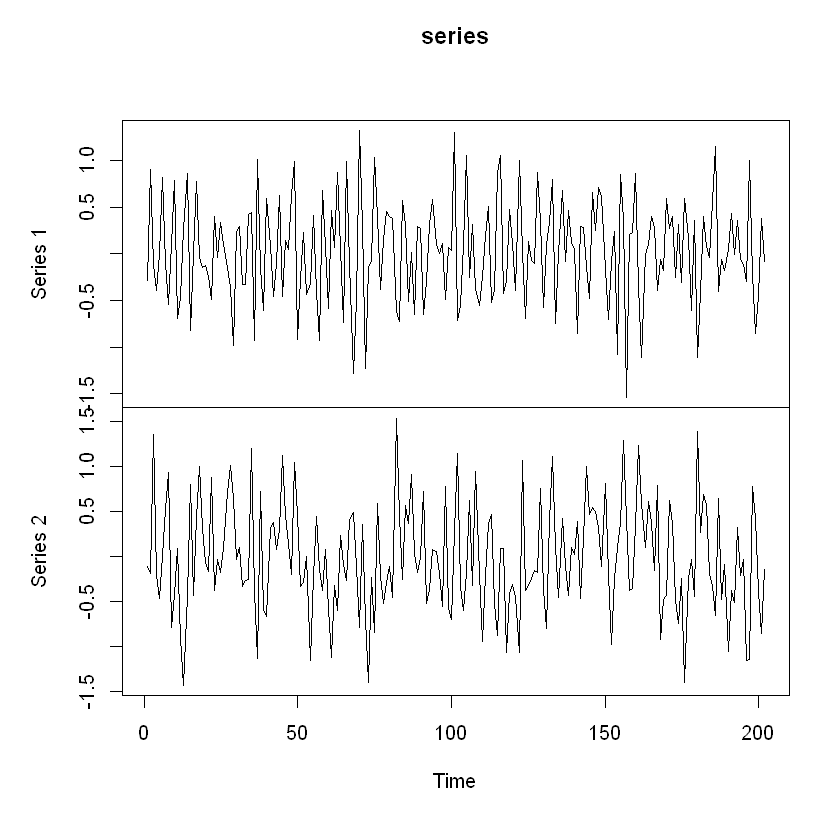

In [9]:
series <- ts(t(series[, -(1:p)])) # Convert to time series format
names <- c("V1", "V2") # Rename variables

plot.ts(series) # Plot the series

In order to estimate the VAR model, you may use the **vars package** by Pfaff (2008). 

The relevant function is VAR and its use is straightforward. 

You just have to load the package and specify the **data (y)**, **order (p)** and the **type of the model**. 

The option type determines whether to include an intercept term, a trend or both in the model. 

Since the artificial sample does not contain any deterministic term, we neglect it in the estimation by setting type = "none".

In [10]:
install.packages("vars")
library(vars) # Load package

Installing package into 'C:/Users/Enric/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'vars' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Enric\AppData\Local\Temp\RtmpGCCT4G\downloaded_packages


Loading required package: MASS

Loading required package: strucchange

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: urca

Loading required package: lmtest



In [11]:
var.1 <- VAR(series, 2, type = "none") # Estimate the model VAR(2)

# Model comparison
A central issue in VAR analysis is to find the number of lags, which yields the best results. 

Model comparison is usually based on information criteria like the **AIC**, **BIC** or **HQ**. 

Usually, the **AIC** is preferred over other criteria, due to its favourable **small sample forecasting features**. 

The **BIC and HQ**, however, work well in **large samples**.

When **type** is set to **NULL**, the VAR function will attempt to choose an **appropriate estimation method** based on the characteristics of the input data. The function will consider factors such as the sample size, whether the data is stationary or not, and other relevant properties.

The VAR function of the vars package already allows to calculate standard information criteria to find the best model. In this example we use the AIC:

In [12]:
var.aic <- VAR(series, type = "none", lag.max = 5, ic = "AIC")

Note that *instead of specifying the order p*, we now set the **maximum lag length of the model** and the **information criterion used to select the best model**. 

The function then estimates all five models, compares them according to their AIC values and automatically selects the most favourable. Looking at summary(var.aic) we see that the AIC suggests to use an order of 2 which is the true order.

The specification type = "none" in the VAR function indicates that **no deterministic variables** are included in the model. 

This means that the model relies solely on **lagged values of the endogenous variables** for prediction.

In [13]:
summary(var.aic)


VAR Estimation Results:
Endogenous variables: Series.1, Series.2 
Deterministic variables: none 
Sample size: 200 
Log Likelihood: -266.065 
Roots of the characteristic polynomial:
0.6611 0.6611 0.4473 0.03778
Call:
VAR(y = series, type = "none", lag.max = 5, ic = "AIC")


Estimation results for equation Series.1: 
Series.1 = Series.1.l1 + Series.2.l1 + Series.1.l2 + Series.2.l2 

            Estimate Std. Error t value Pr(>|t|)    
Series.1.l1 -0.19750    0.06894  -2.865  0.00463 ** 
Series.2.l1 -0.32015    0.06601  -4.850 2.51e-06 ***
Series.1.l2 -0.23210    0.07586  -3.060  0.00252 ** 
Series.2.l2  0.04687    0.06478   0.724  0.47018    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 0.4638 on 196 degrees of freedom
Multiple R-Squared: 0.2791,	Adjusted R-squared: 0.2644 
F-statistic: 18.97 on 4 and 196 DF,  p-value: 3.351e-13 


Estimation results for equation Series.2: 
Series.2 = Series.1.l1 + Series.2.l1 + Series.1.l2 + Series.2.l2 

Looking at the results more closely we can compare the true values - cointained in object A - with the parameter estimates of the model:



In [14]:
# True values
A

-0.3,-0.4,-0.1,0.10
0.6,0.5,-0.2,0.05


In [15]:
# Extract coefficients, standard errors etc. from the object
# produced by the VAR function
est_coefs <- coef(var.aic)

# Extract only the coefficients for both dependend variables
# and combine them to a single matrix
est_coefs <- rbind(est_coefs[[1]][, 1], est_coefs[[2]][, 1]) 

# Print the rounded estimates in the console
round(est_coefs, 2)

Series.1.l1,Series.2.l1,Series.1.l2,Series.2.l2
-0.20,-0.32,-0.23,0.05
0.67,0.34,-0.18,0.07
